In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib


     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -------------------------------------- 160.8/160.8 kB 9.4 MB/s eta 0:00:00
  Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   --- ------------------------------------ 0.6/7.6 MB 12.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.6 MB 13.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.6 MB 9.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.6 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.6 MB 10.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.6 MB 10.7 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.6 MB 10.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 11.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.5/7.6 MB 11.1 MB/s eta 0:00:01
   ----------

In [13]:
pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 294.8/294.8 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install fastai

     ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
     ---------------------------------------- 67.6/67.6 kB ? eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/45.9 kB ? eta -:--:--
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/65.6 kB ? eta -:--:--
     ---------------------------------------- 65.6/65.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/181.6 kB ? eta -:--:--
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp310-

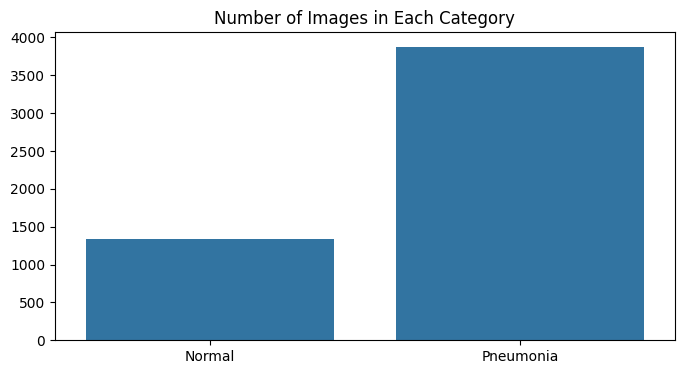

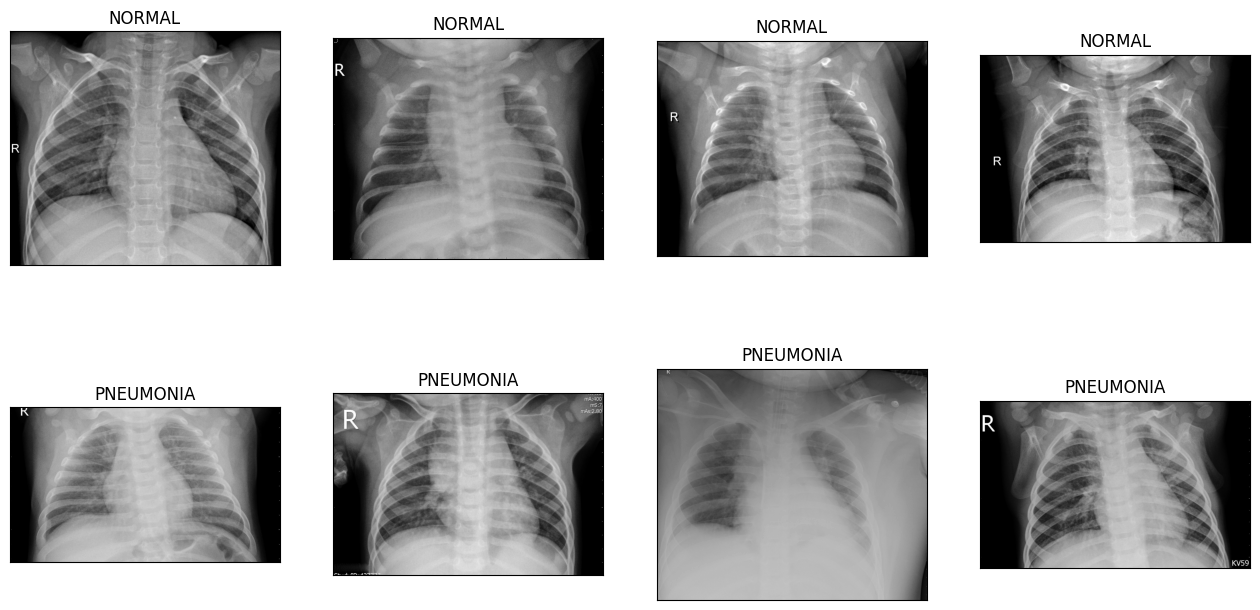

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fastai.vision.all import *

#Analyze the data

data_dir = 'train'

# Plot the number of images in each category
normal_count = len(os.listdir(os.path.join(data_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(data_dir, 'PNEUMONIA')))
plt.figure(figsize=(8, 4))
sns.barplot(x=['Normal', 'Pneumonia'], y=[normal_count, pneumonia_count])
plt.title('Number of Images in Each Category')
plt.show()

# Display some sample images
normal_files = os.listdir(os.path.join(data_dir, 'NORMAL'))
pneumonia_files = os.listdir(os.path.join(data_dir, 'PNEUMONIA'))
sample_normal_files = np.random.choice(normal_files, 4, replace=False)
sample_pneumonia_files = np.random.choice(pneumonia_files, 4, replace=False)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i, filename in enumerate(sample_normal_files):
    img = plt.imread(os.path.join(data_dir, 'NORMAL', filename))
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title('NORMAL')
for i, filename in enumerate(sample_pneumonia_files):
    img = plt.imread(os.path.join(data_dir, 'PNEUMONIA', filename))
    axs[1, i].imshow(img, cmap='gray')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[1, i].set_title('PNEUMONIA')
plt.show()

In [16]:
path = Path('')

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=[Resize(460, method='pad'),
                              RandomResizedCrop(224, min_scale=0.5)],
                   batch_tfms=[*aug_transforms(flip_vert=True,
                                               max_lighting=0.1,
                                               max_zoom=1.05,
                                               max_warp=0.),
                               Normalize.from_stats(*imagenet_stats)])


c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [17]:
dls = dblock.dataloaders(path/'train', bs=64)


In [18]:
metrics = [accuracy, F1Score(), Precision(), Recall()]
learn = cnn_learner(dls, resnet50, loss_func=CrossEntropyLossFlat(), metrics=metrics)
learn.fine_tune(10, 1e-3)


c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Bekhzod/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 12.2MB/s]


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.751164,0.377434,0.866731,0.913932,0.877527,0.953488,07:11


c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.434533,0.256393,0.929051,0.950993,0.975543,0.927649,08:10
1,0.331790,0.231844,0.938639,0.957839,0.977151,0.939276,08:08
2,0.304327,0.214479,0.938639,0.957839,0.977151,0.939276,08:08
3,0.252148,0.170666,0.950144,0.966538,0.962821,0.970284,08:09
4,0.229527,0.192059,0.946309,0.963158,0.981233,0.945736,08:16
5,0.184280,0.132935,0.962608,0.974526,0.985469,0.963824,08:22
6,0.161140,0.114409,0.960690,0.973599,0.970475,0.976744,08:10
7,0.148363,0.116269,0.960690,0.973531,0.972903,0.974160,08:08
8,0.142110,0.117455,0.960690,0.973633,0.969270,0.978036,08:10
9,0.131685,0.123908,0.956855,0.970986,0.969112,0.972868,08:19


c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\Bekhzod\OneDrive\Ishchi stol\Pneumonia_prediction\.venv\lib\sit

In [19]:
# Save the trained model
learn.export('pneumonia_classifier.pkl')